In [1]:
from google.colab import files
uploaded = files.upload()


Saving air_health.db to air_health.db


ბაზასთან კავშირი წარმატებით შეიქმნა.
ბაზაში არსებული ცხრილები: [('air_data',)]

ქალაქები, სადაც AQI მეტია 300-ზე:
('Los Angeles', '2020-01-08', 449)
('Beijing', '2020-01-11', 484)
('Tokyo', '2020-01-12', 472)
('Beijing', '2020-01-15', 475)
('Los Angeles', '2020-01-21', 402)
('Cairo', '2020-01-23', 429)
('Los Angeles', '2020-01-25', 385)
('Beijing', '2020-01-27', 382)
('Mexico City', '2020-01-30', 470)
('Los Angeles', '2020-01-31', 388)
('Beijing', '2020-02-03', 302)
('Beijing', '2020-02-07', 441)
('Beijing', '2020-02-10', 378)
('Los Angeles', '2020-02-12', 422)
('Beijing', '2020-02-13', 432)
('London', '2020-02-14', 347)
('Los Angeles', '2020-02-22', 326)
('Los Angeles', '2020-02-25', 362)
('Beijing', '2020-02-26', 386)
('Mexico City', '2020-02-27', 470)
('Mexico City', '2020-03-01', 439)
('Mexico City', '2020-03-03', 403)
('Mexico City', '2020-03-06', 494)
('London', '2020-03-13', 332)
('Mexico City', '2020-03-19', 301)
('Mexico City', '2020-03-21', 329)
('London', '2020-03-23', 316)


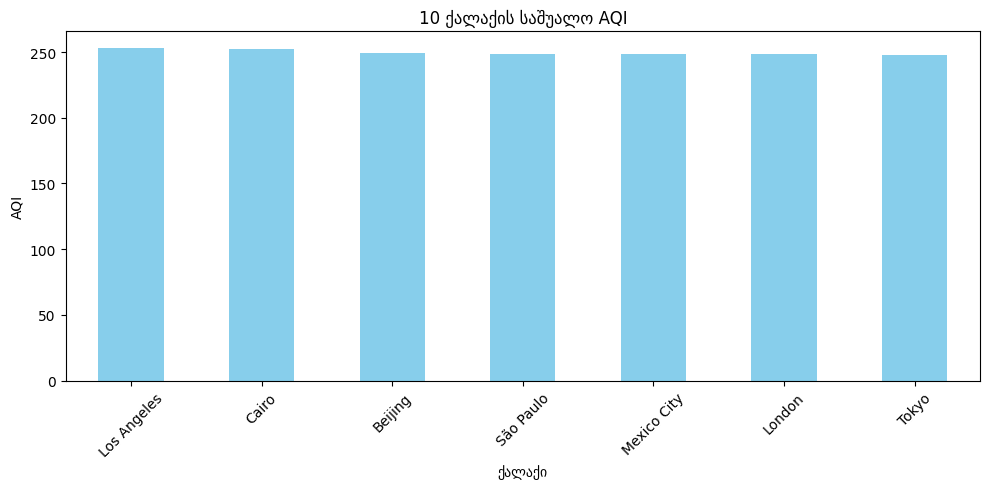

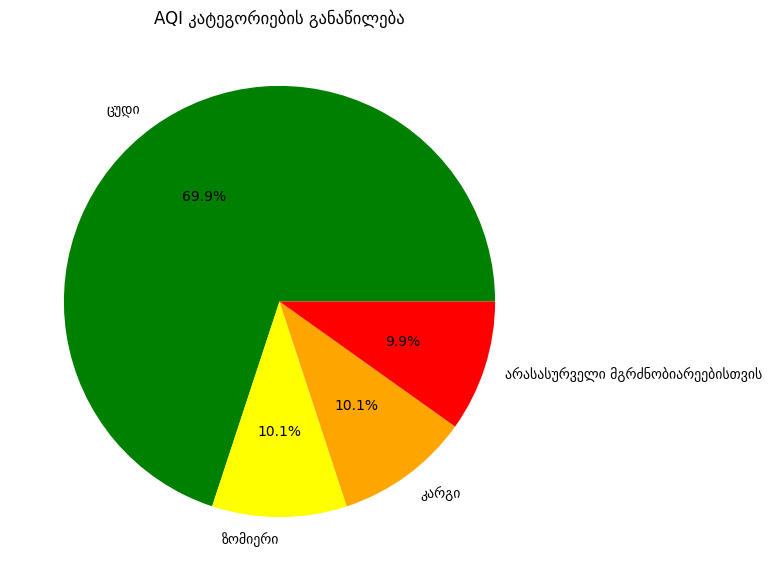

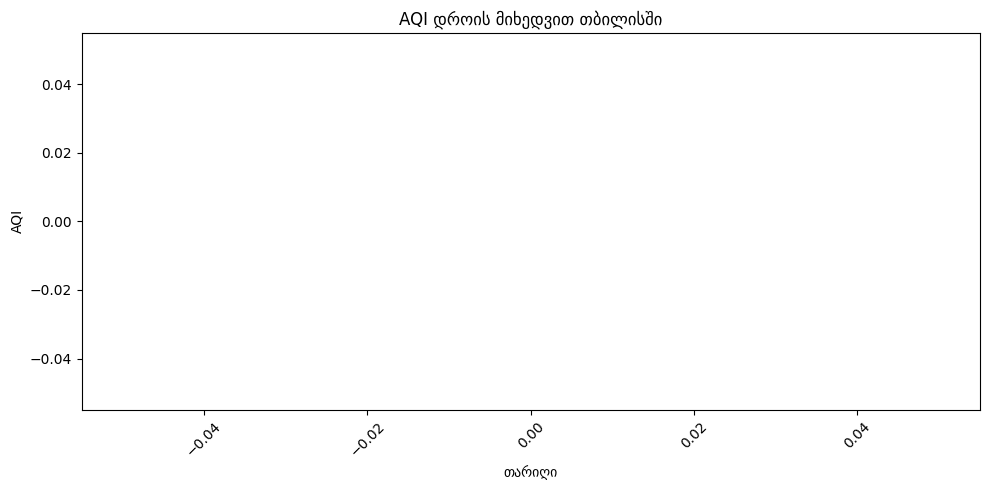


ბაზასთან კავშირი წარმატებით შეწყვეტილია.


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. ბაზასთან კავშირი
conn = sqlite3.connect('air_health.db')  # დარწმუნდი, რომ ფაილი ატვირთულია Colab-ში
cursor = conn.cursor()
print("ბაზასთან კავშირი წარმატებით შეიქმნა.")

# 2. ბაზაში არსებული ცხრილების ნახვა
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("ბაზაში არსებული ცხრილები:", tables)

# 3. მონაცემების წაკითხვა კონკრეტული კრიტერიუმით (AQI > 300)
cursor.execute("SELECT city, date, aqi FROM air_data WHERE aqi > 300")
rows = cursor.fetchall()
print("\nქალაქები, სადაც AQI მეტია 300-ზე:")
for row in rows:
    print(row)

# 4. ახალი ჩანაწერის დამატება (ცვლადებიდან)
new_city = "Delhi"
new_date = "2025-06-26"
new_aqi = 307

cursor.execute("INSERT INTO air_data (city, date, aqi) VALUES (?, ?, ?)", (new_city, new_date, new_aqi))
conn.commit()
print("\nახალი ჩანაწერი წარმატებით დამატებულია.")

# 5. ჩანაწერის განახლება
target_city = "Delhi"
new_aqi_value = 310

cursor.execute("UPDATE air_data SET aqi = ? WHERE city = ?", (new_aqi_value, target_city))
conn.commit()
print("ჩანაწერი წარმატებით განახლდა.")

# 6. ჩანაწერის წაშლა
delete_city = "Delhi"

cursor.execute("DELETE FROM air_data WHERE city = ?", (delete_city,))
conn.commit()
print("ჩანაწერი წარმატებით წაიშალა.")

# 7. მონაცემების pandas DataFrame-ში გადატანა დიაგრამებისთვის
df = pd.read_sql_query("SELECT * FROM air_data", conn)

# 8. დიაგრამა 1: სვეტური დიაგრამა (10 ქალაქის საშუალო AQI)
plt.figure(figsize=(10, 5))
top_cities = df.groupby('city')['aqi'].mean().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', color='skyblue')
plt.title('10 ქალაქის საშუალო AQI')
plt.ylabel('AQI')
plt.xlabel('ქალაქი')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# სვეტური დიაგრამა აჩვენებს 10 ქალაქის საშუალო ჰაერის ხარისხს.

# 9. დიაგრამა 2: წრიული დიაგრამა - AQI კატეგორიების განაწილება
def aqi_category(aqi):
    if aqi <= 50:
        return 'კარგი'
    elif aqi <= 100:
        return 'ზომიერი'
    elif aqi <= 150:
        return 'არასასურველი მგრძნობიარეებისთვის'
    else:
        return 'ცუდი'

df['aqi_cat'] = df['aqi'].apply(aqi_category)
category_counts = df['aqi_cat'].value_counts()

plt.figure(figsize=(7, 7))
category_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'yellow', 'orange', 'red'])
plt.title('AQI კატეგორიების განაწილება')
plt.ylabel('')
plt.show()
# წრიული დიაგრამა აჩვენებს AQI კატეგორიების გავრცელებას.

# 10. დიაგრამა 3: Scatter plot - AQI დროის მიხედვით თბილისში
tbilisi_data = df[df['city'].str.lower() == 'tbilisi']
plt.figure(figsize=(10, 5))
plt.scatter(tbilisi_data['date'], tbilisi_data['aqi'], color='purple')
plt.title('AQI დროის მიხედვით თბილისში')
plt.xlabel('თარიღი')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Scatter plot აჩვენებს AQI-ის ცვლილებას დროის მიხედვით თბილისში.

# 11. ბაზასთან კავშირის გათიშვა
conn.close()
print("\nბაზასთან კავშირი წარმატებით შეწყვეტილია.")
